In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data=pd.read_csv('data.csv').drop('Unnamed: 0',axis=1)

In [3]:
all_date=data.date.unique()
data.head()

,date,hour,X(t-1),X(t-2),X(t)
0,16-07-02,0,7.0,7.0,5.5
1,16-07-02,1,5.5,7.0,5.0
2,16-07-02,2,5.0,5.5,5.0
3,16-07-02,3,5.0,5.0,6.0
4,16-07-02,4,6.0,5.0,6.0


In [4]:
count=0
for i in range(8064):
    if data.date[i] in all_date[0:(len(all_date)-30)]:
        count=count+1
Training=data.loc[0:count,:]
Testing=data.loc[count:8064,:]

## Foursquare Data

In [5]:
CLIENT_ID = '4HRKK2B5E2FEWVZBPCB4OYXH4BXSLBK30X0D1Q4KKT33MRWV' 
CLIENT_SECRET = 'HBACJX3VXSXJ1QU3U5WQVYQOWVHCNS1UCU55AS42P4AKL3KU' 
VERSION = '20180605'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 4HRKK2B5E2FEWVZBPCB4OYXH4BXSLBK30X0D1Q4KKT33MRWV
CLIENT_SECRET:HBACJX3VXSXJ1QU3U5WQVYQOWVHCNS1UCU55AS42P4AKL3KU


In [6]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    if names != "job":
        nearby_venues = 0
    else:
        venues_list=[]
        for name, lat, lng in zip(names, latitudes, longitudes):
            print(name)

            # create the API request URL
            url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION, 
                lat, 
                lng, 
                radius, 
                100)

            # make the GET request
            results = requests.get(url).json()["response"]['groups'][0]['items']

            # return only relevant information for each nearby venue
            venues_list.append([(
                name, 
                lat, 
                lng, 
                v['venue']['name'], 
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],  
                v['venue']['categories'][0]['name']) for v in results])

        nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
        nearby_venues.columns = ['Neighbourhood', 
                      'Neighbourhood Latitude', 
                      'Neighbourhood Longitude', 
                      'Venue', 
                      'Venue Latitude', 
                      'Venue Longitude', 
                      'Venue Category']
    
    return(nearby_venues)

In [7]:
Newyork_venues = getNearbyVenues('Neighbourhood','Latitude','Longitude', 500)

## Linear Regression

In [8]:
X_train=Training.drop(['X(t)','date'],axis=1)
y_traing=Training['X(t)']

X_test=Testing.drop(['X(t)','date'],axis=1)
y_test=Testing['X(t)']

In [9]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_traing)
y_pred=lr.predict(X_test)

In [10]:
from sklearn import metrics
lr.score(X_test,y_test),metrics.mean_squared_error(y_test, y_pred)

(0.5468156875829238, 18.453365229893482)

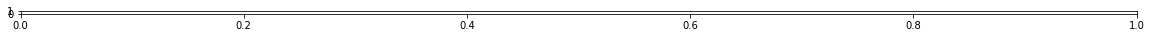

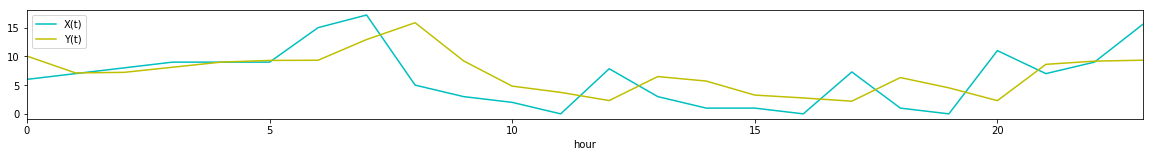

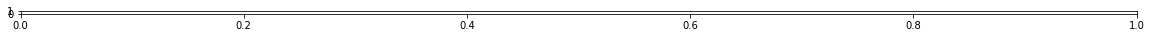

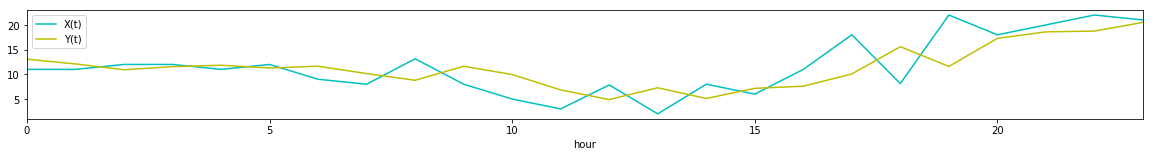

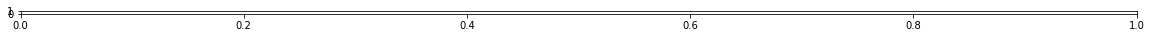

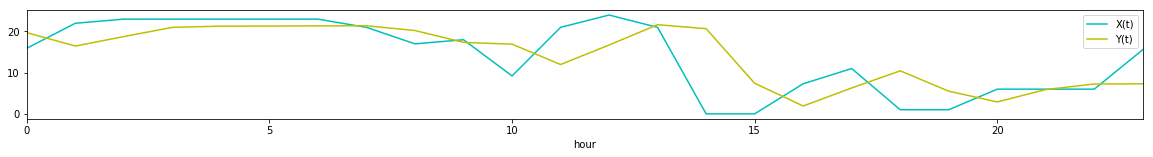

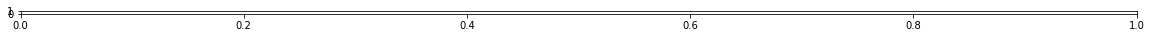

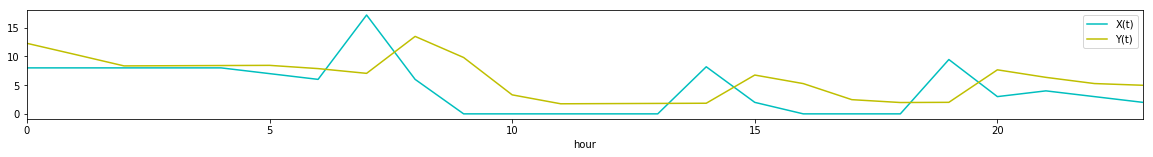

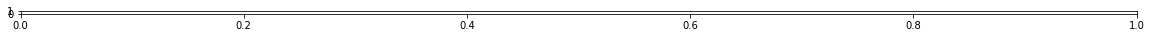

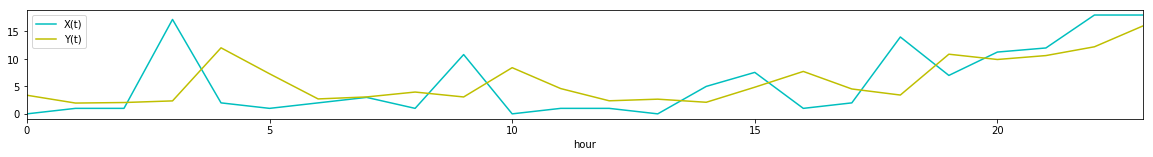

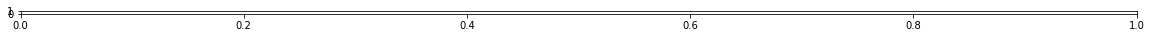

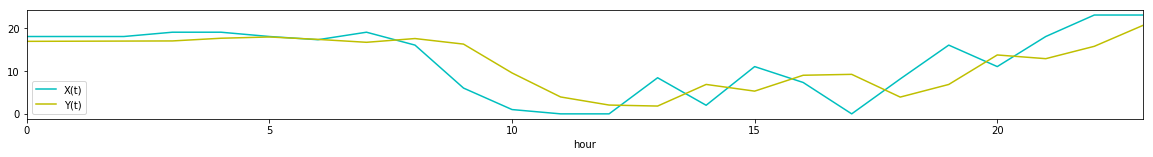

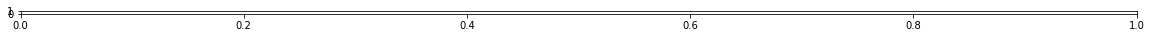

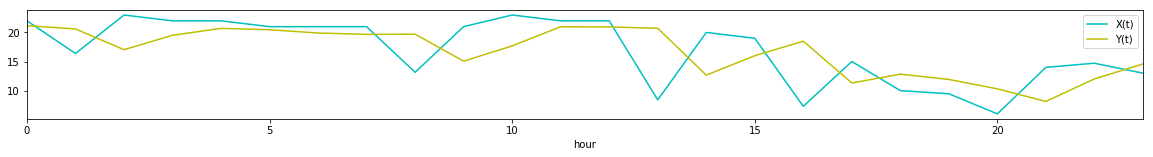

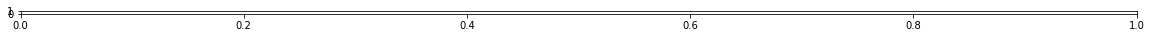

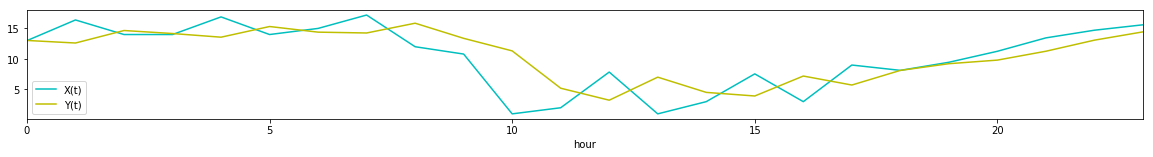

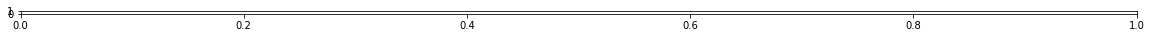

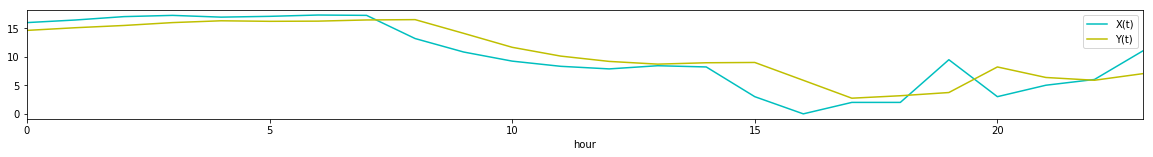

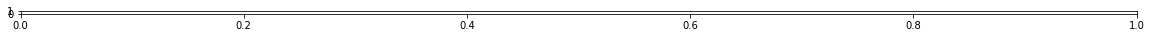

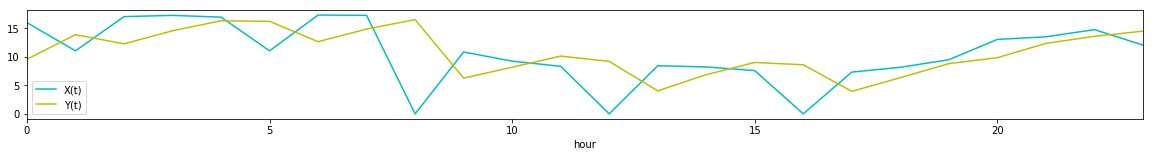

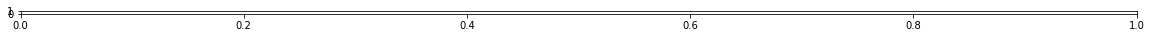

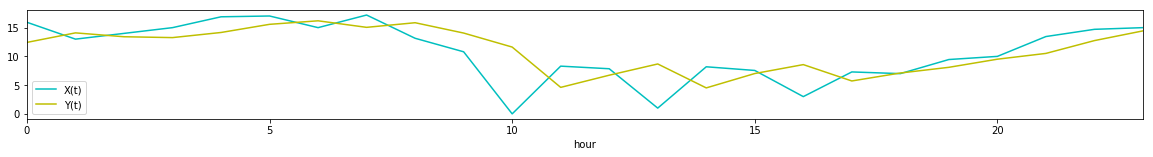

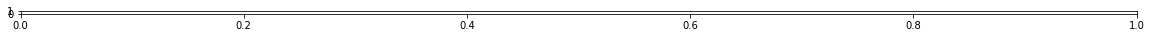

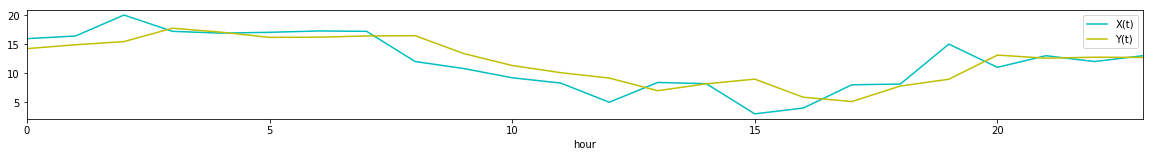

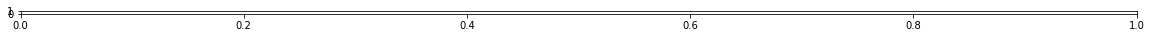

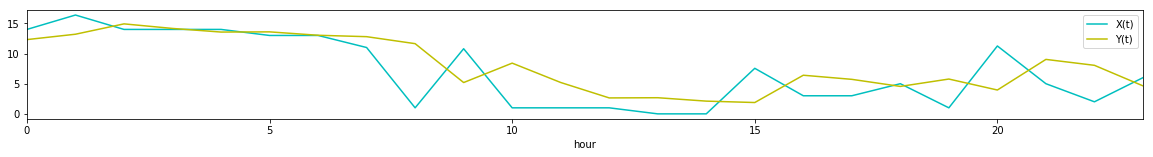

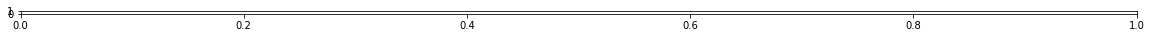

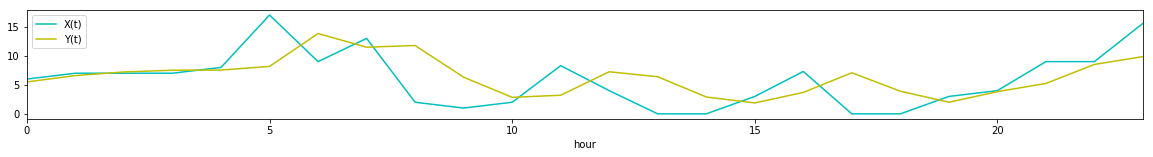

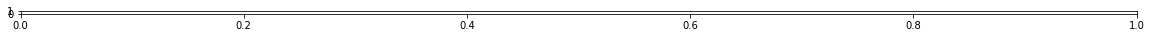

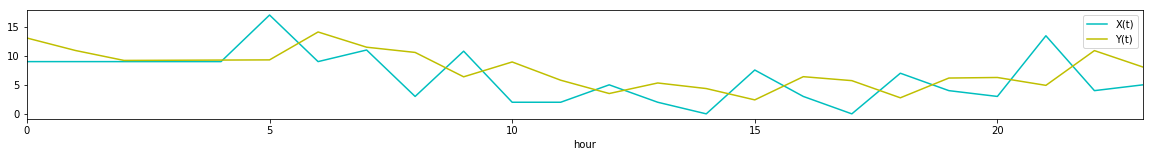

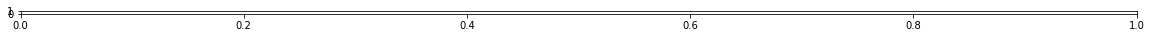

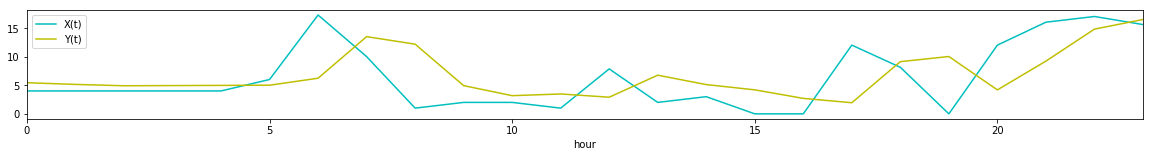

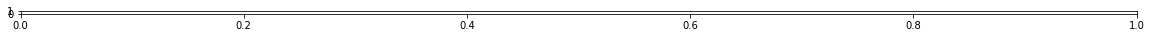

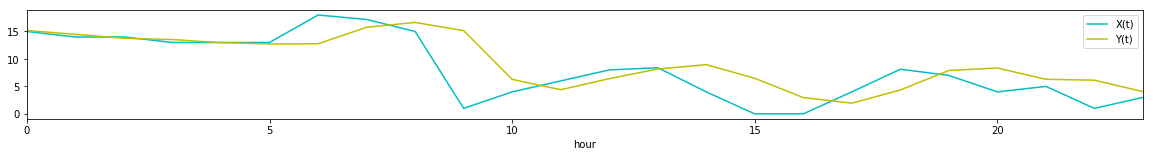

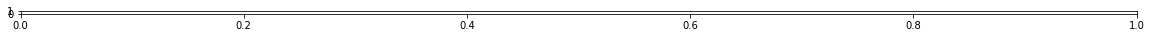

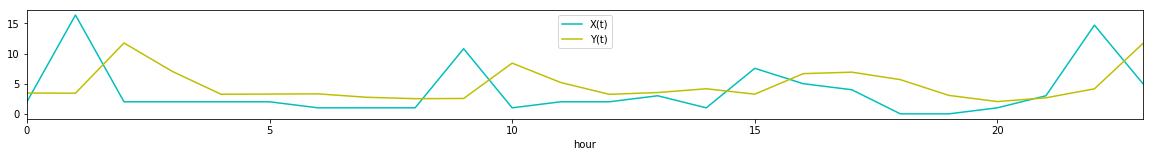

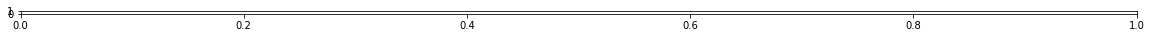

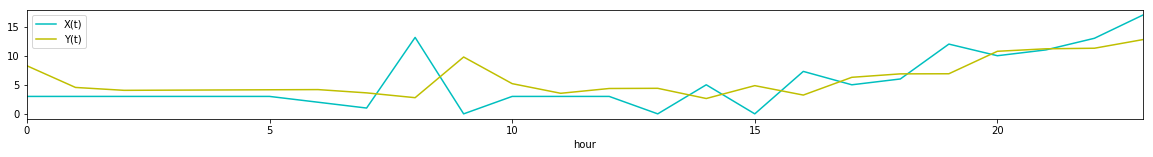

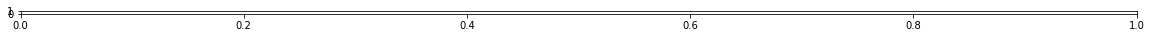

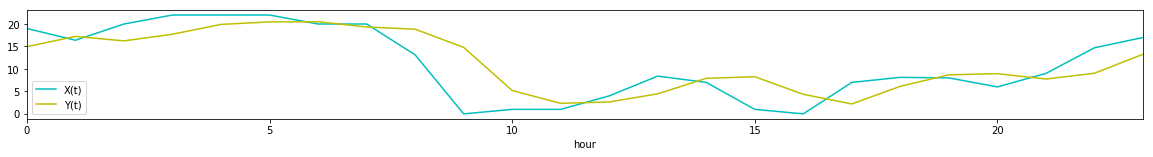

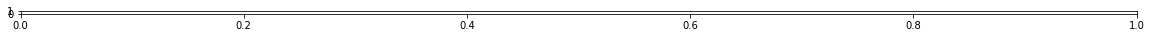

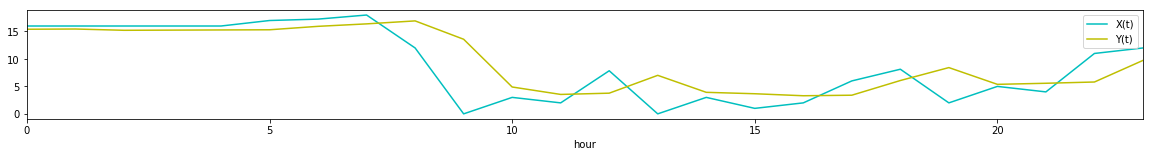

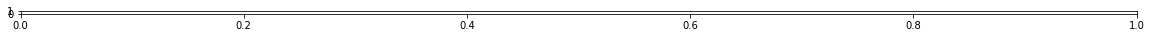

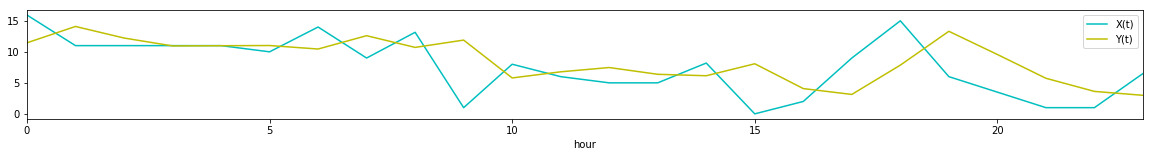

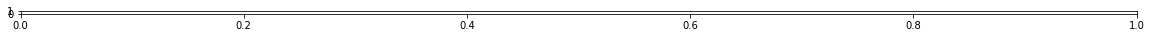

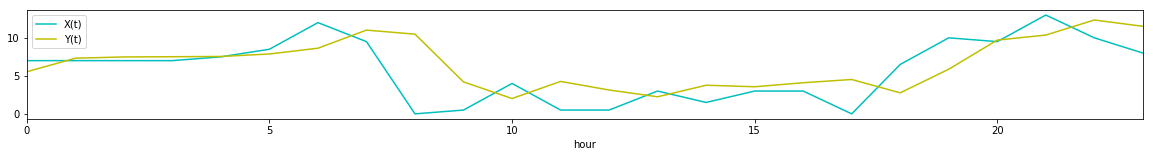

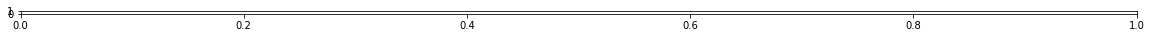

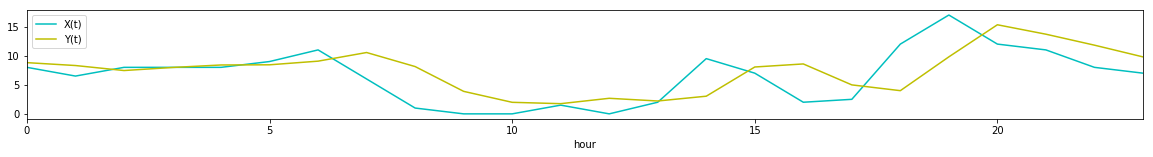

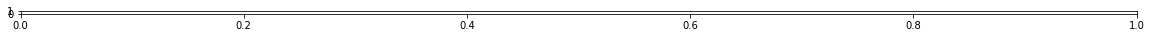

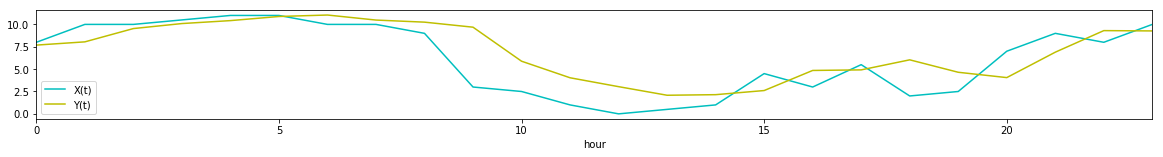

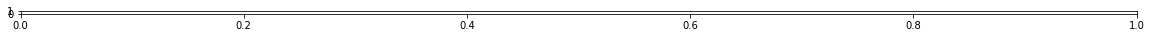

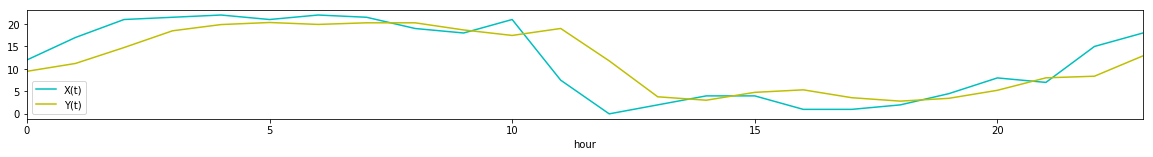

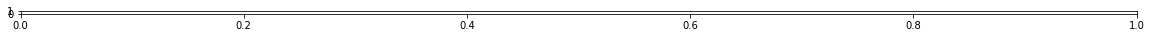

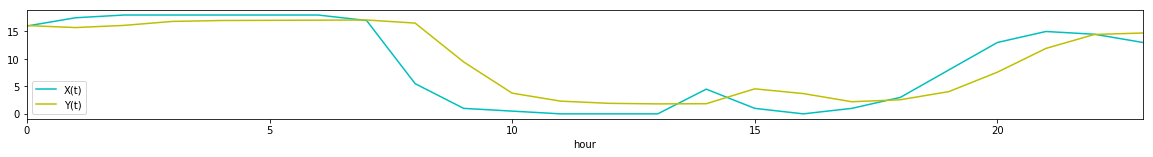

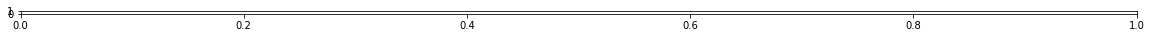

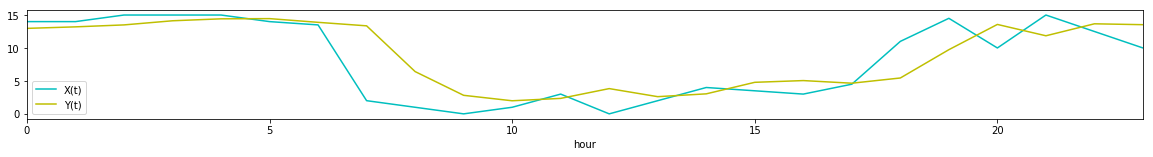

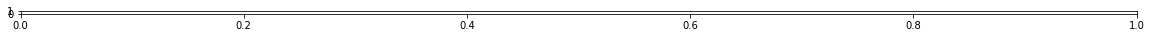

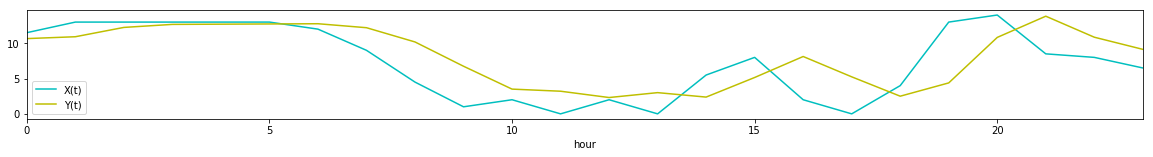

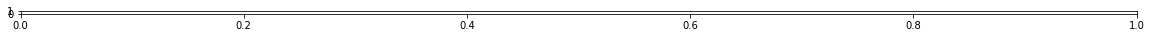

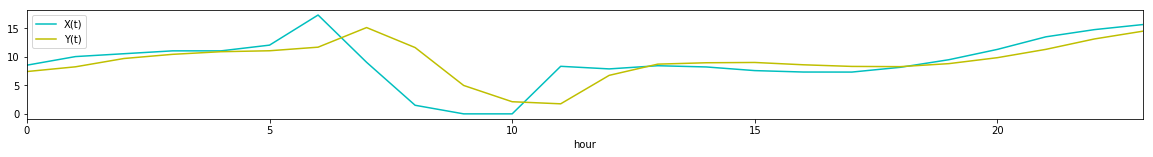

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=20,2
fignum=1
for i in range(len(all_date)-30,len(all_date)):
    curr_date=all_date[i]
    plt.subplot(30,1,fignum)
    y_given=Testing.loc[Testing.date==curr_date,['hour','X(t)']]
    y_given=y_given.set_index('hour')
    ax=y_given.plot(color='c')
    y_hat=y_pred[Testing.date==curr_date]
    y_hat=pd.DataFrame(y_hat,index=y_given.index,columns=['Y(t)'])
    y_hat.plot(color='y',ax=ax)
    plt.show()
    fignum=fignum+1

## SVR

In [12]:
from sklearn.svm import SVR
X_train=Training.drop(['X(t)','date'],axis=1)
y_traing=Training['X(t)']

X_test=Testing.drop(['X(t)','date'],axis=1)
y_test=Testing['X(t)']

In [13]:
svm_lr=SVR(kernel='linear')
svm_lr.fit(X_train,y_traing)
y_pred=svm_lr.predict(X_test)
svm_lr.score(X_test,y_test),metrics.mean_squared_error(y_test, y_pred)

(0.5190807185346776, 19.5827148112092)

In [14]:
svm_pl=SVR(kernel='rbf')
svm_pl.fit(X_train,y_traing)
y_pred=svm_pl.predict(X_test)
svm_pl.score(X_test,y_test),metrics.mean_squared_error(y_test, y_pred)

/home/jupyterlab/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


(0.5563961661360484, 18.063254484719977)

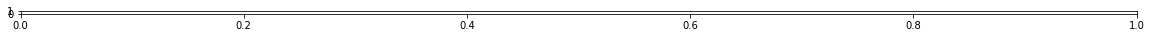

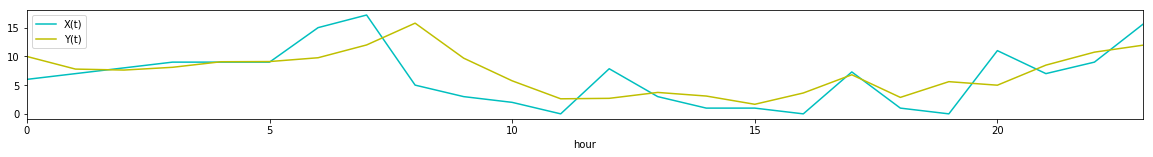

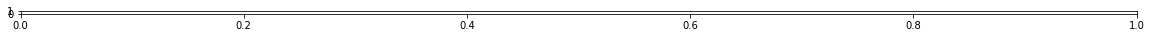

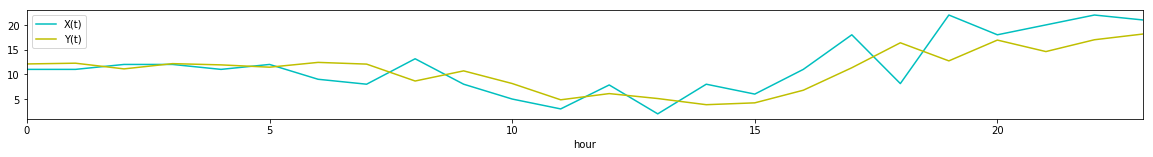

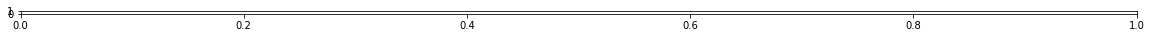

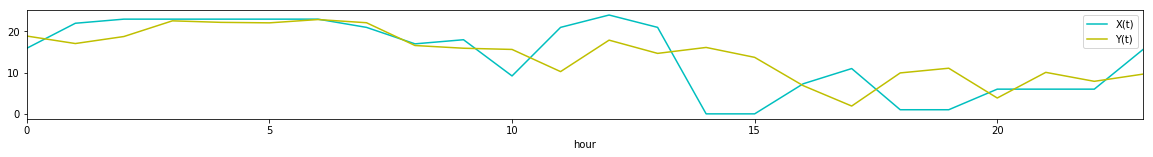

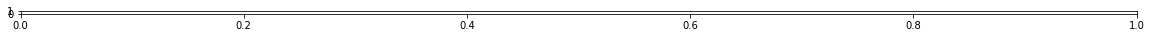

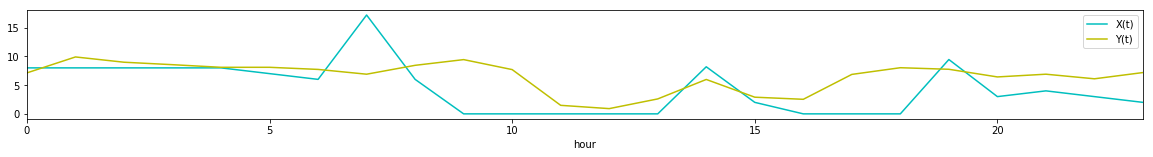

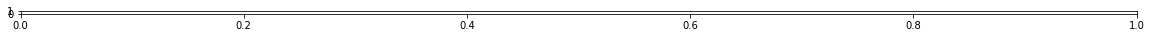

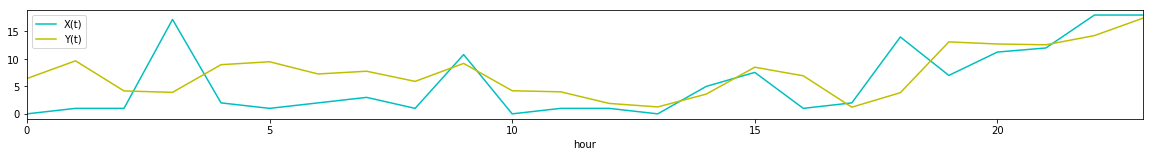

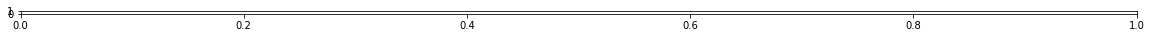

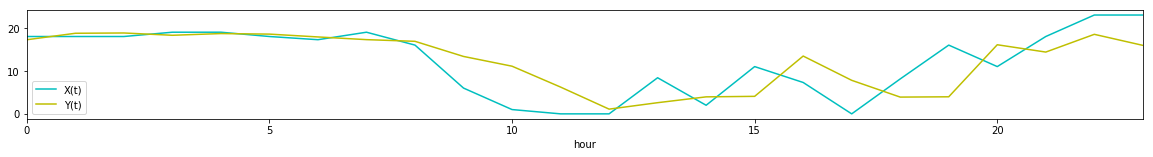

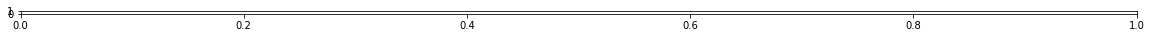

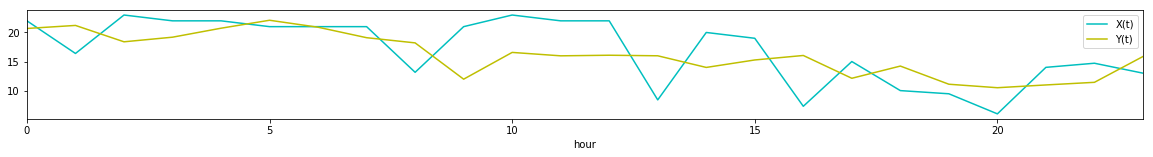

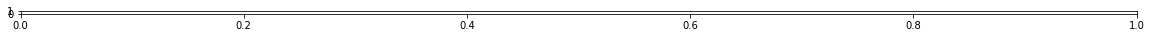

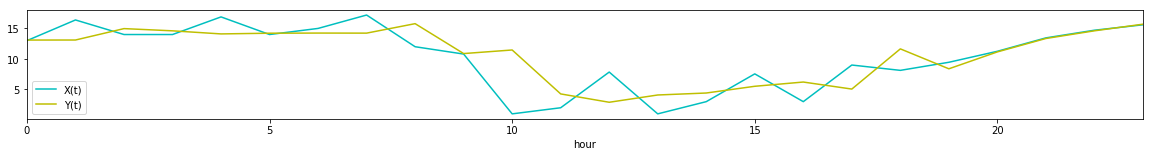

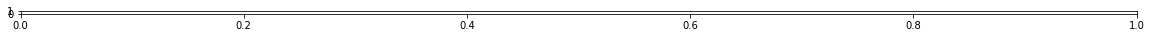

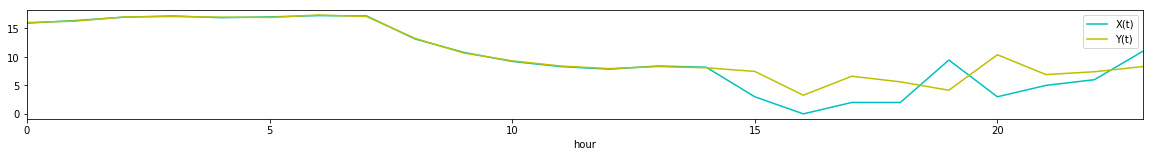

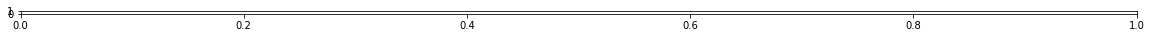

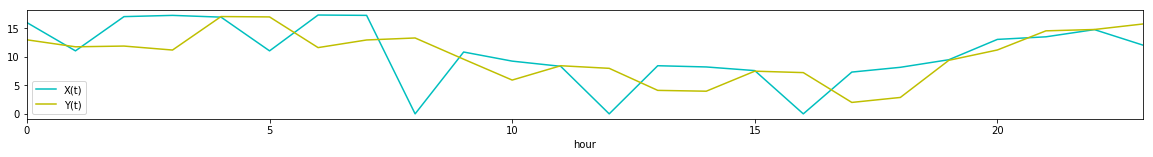

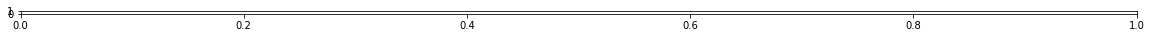

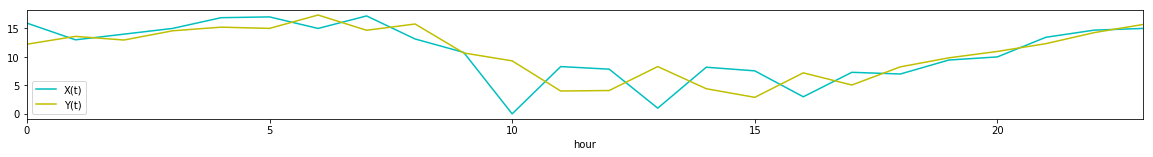

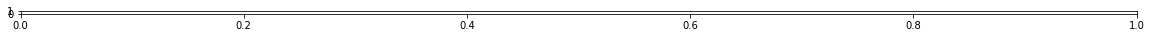

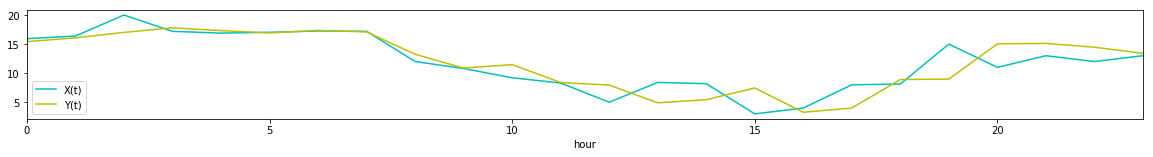

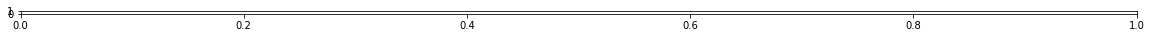

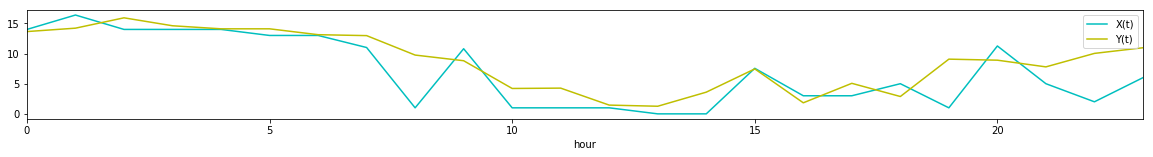

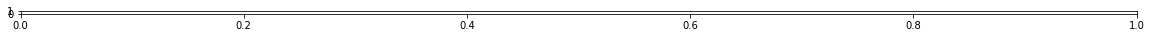

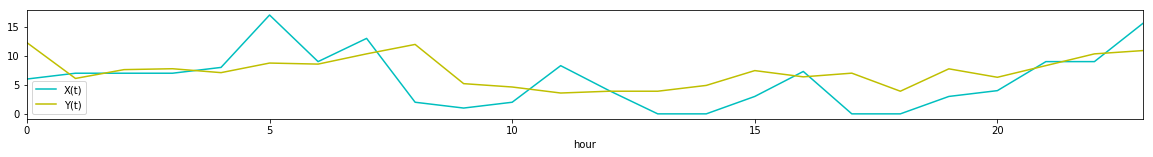

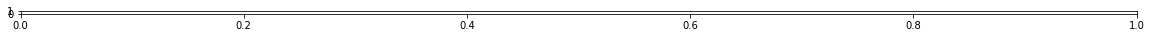

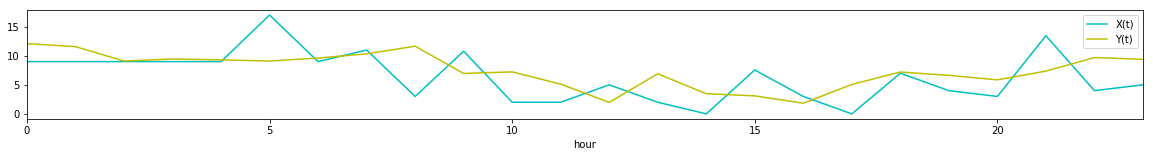

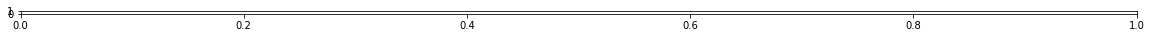

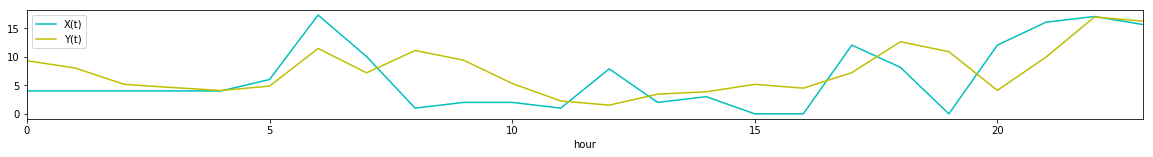

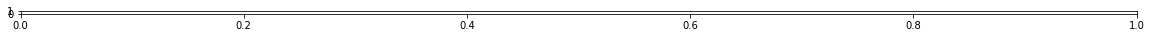

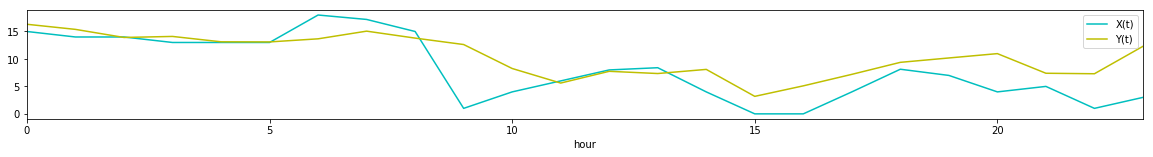

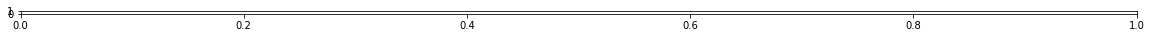

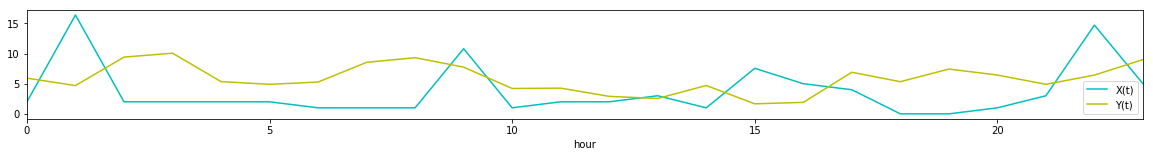

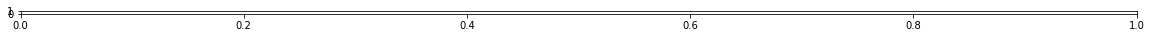

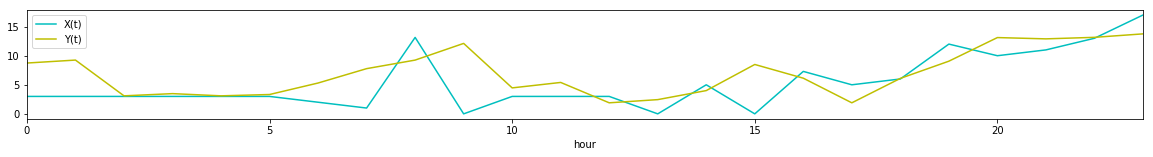

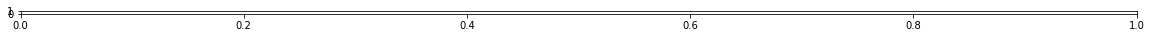

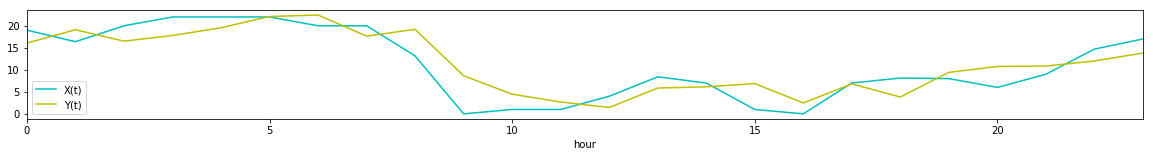

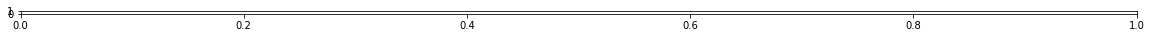

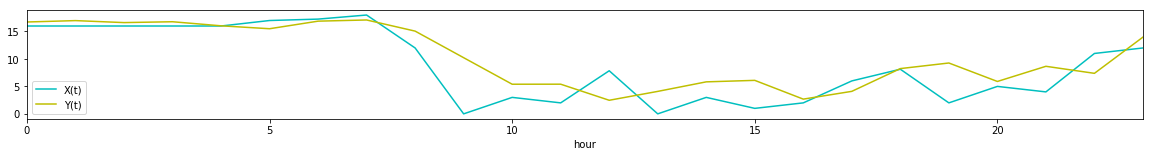

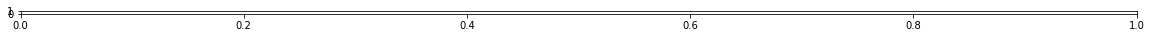

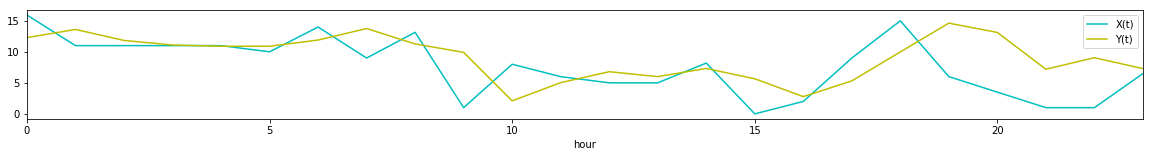

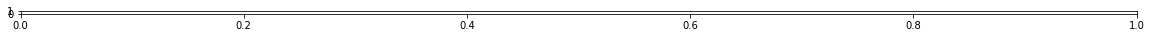

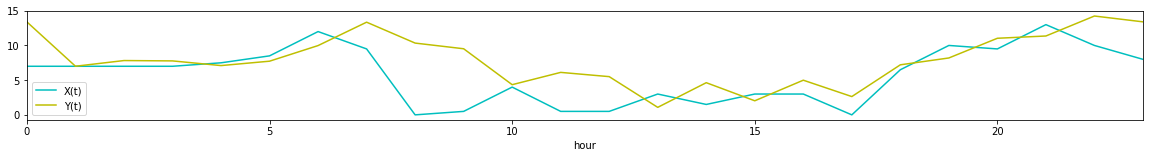

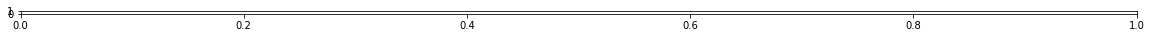

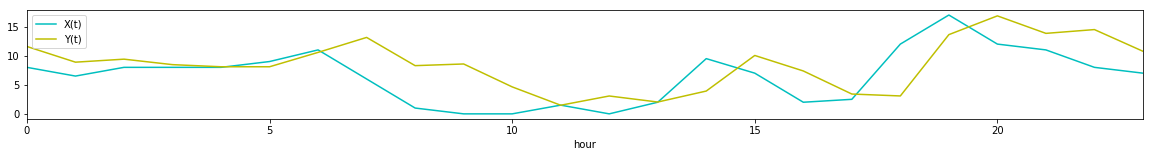

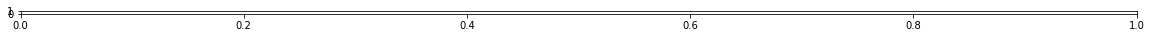

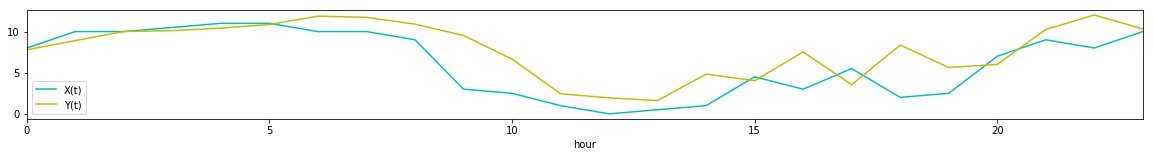

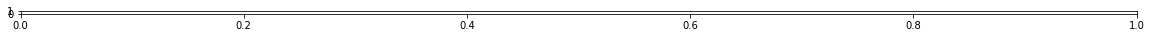

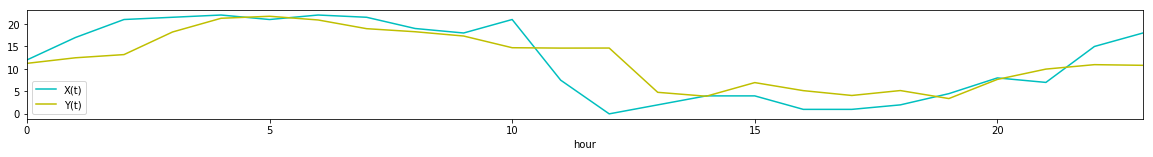

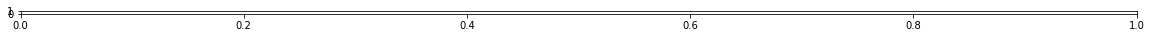

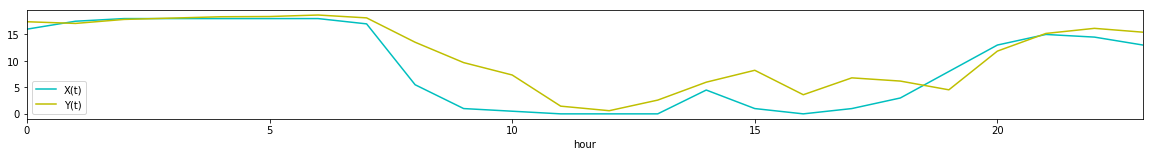

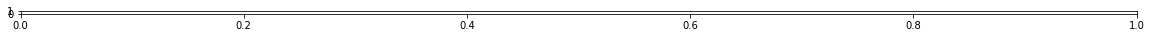

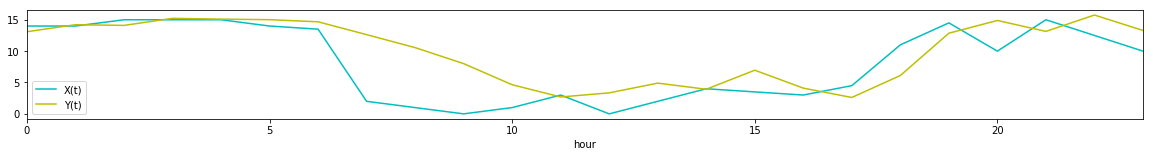

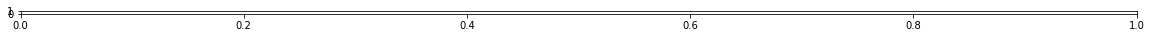

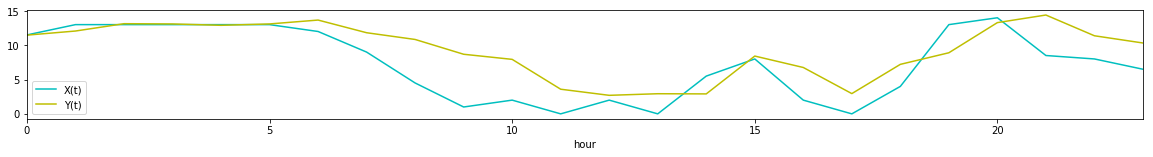

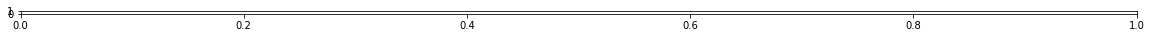

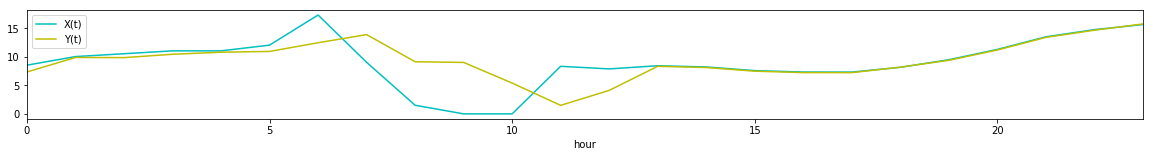

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=20,2
fignum=1
for i in range(len(all_date)-30,len(all_date)):
    curr_date=all_date[i]
    plt.subplot(30,1,fignum)
    y_given=Testing.loc[Testing.date==curr_date,['hour','X(t)']]
    y_given=y_given.set_index('hour')
    ax=y_given.plot(color='c')
    y_hat=y_pred[Testing.date==curr_date]
    y_hat=pd.DataFrame(y_hat,index=y_given.index,columns=['Y(t)'])
    y_hat.plot(color='y',ax=ax)
    plt.show()
    fignum=fignum+1

## Decision Tree

In [16]:
X_train=Training.drop(['X(t)','date'],axis=1)
y_traing=Training['X(t)']

X_test=Testing.drop(['X(t)','date'],axis=1)
y_test=Testing['X(t)']

In [17]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
redt=DecisionTreeRegressor(random_state=3)
redt.fit(X_train,y_traing)
y_pred=redt.predict(X_test)
redt.score(X_test,y_test),metrics.mean_squared_error(y_test, y_pred)

(0.4852623417248282, 20.95977672984855)

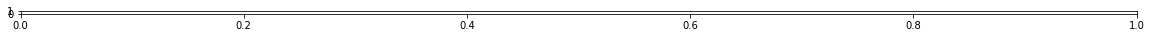

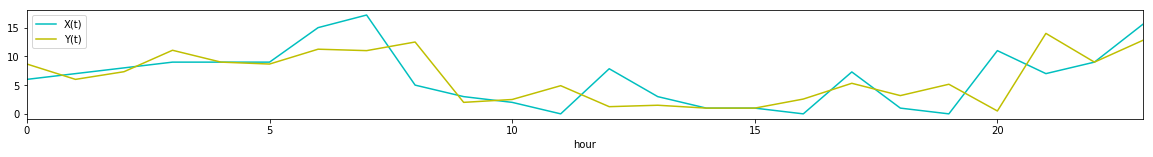

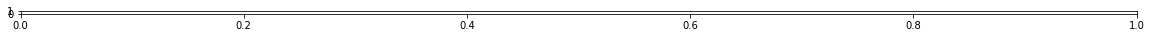

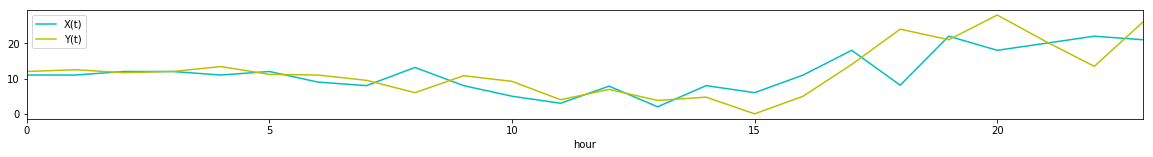

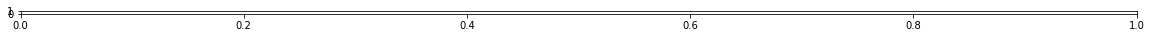

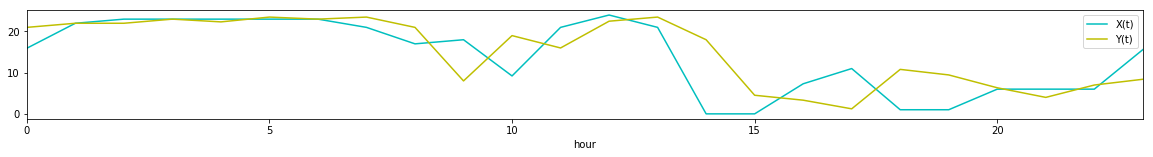

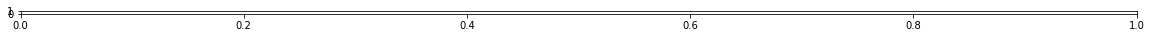

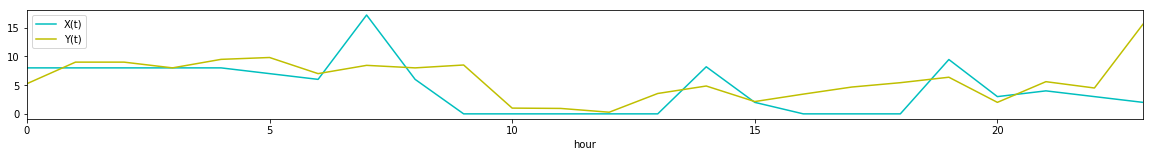

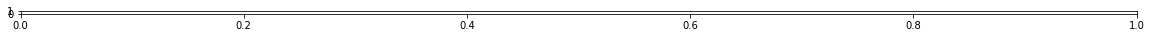

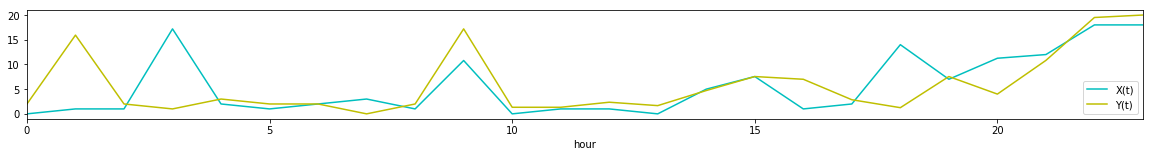

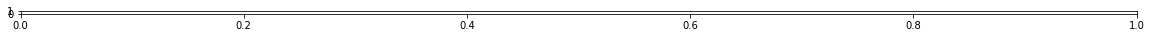

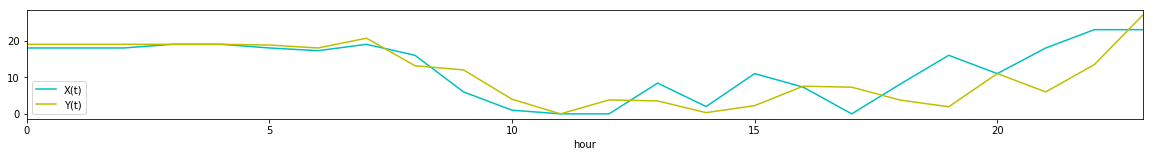

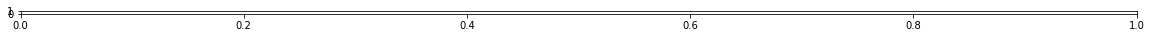

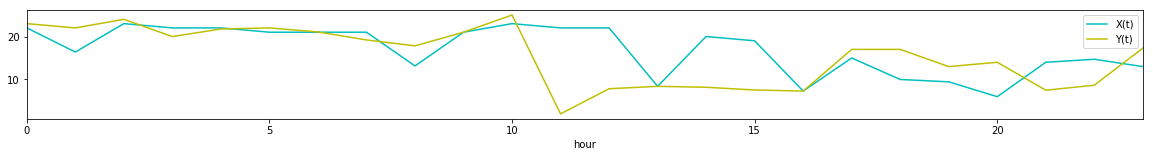

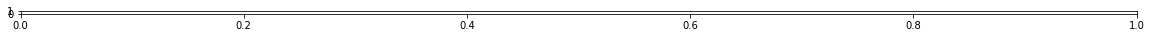

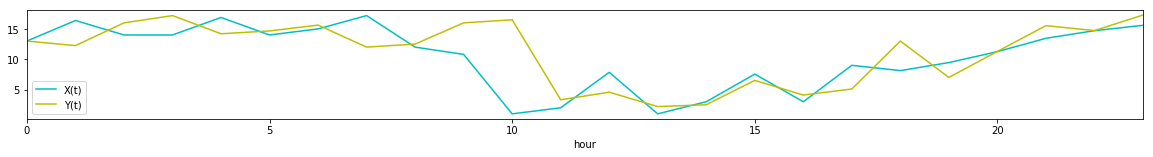

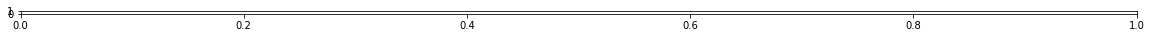

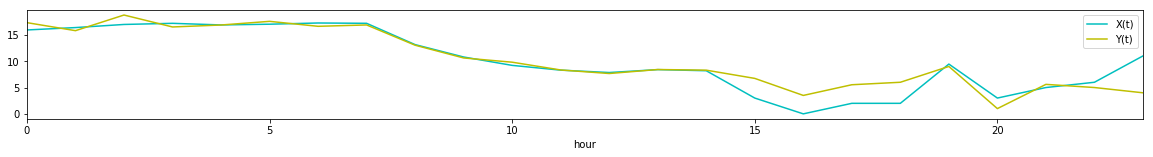

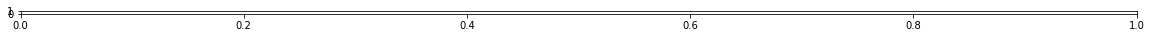

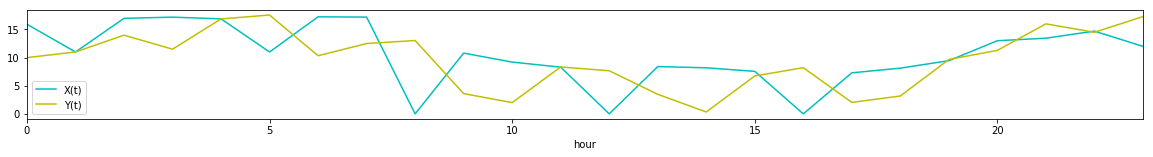

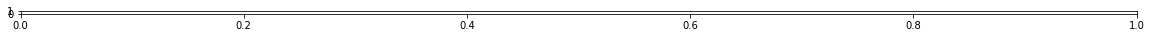

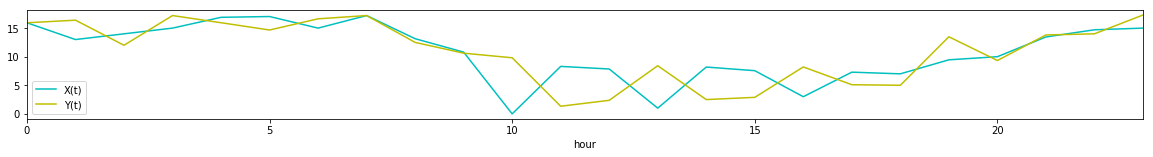

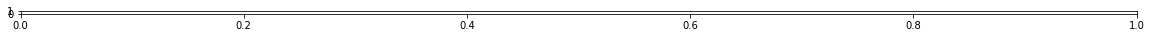

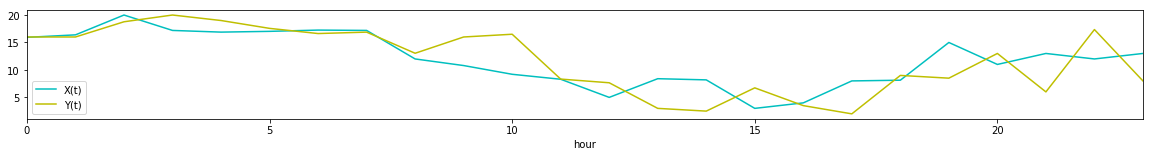

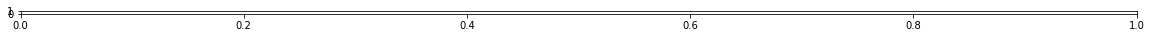

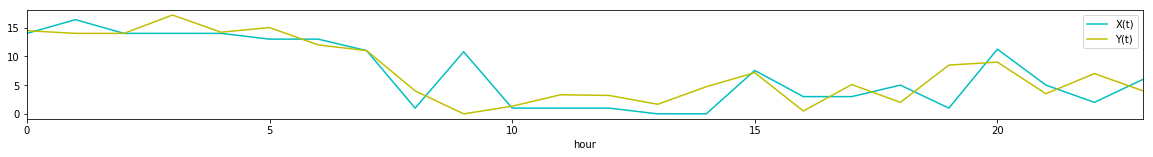

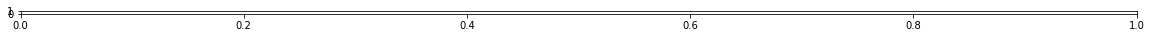

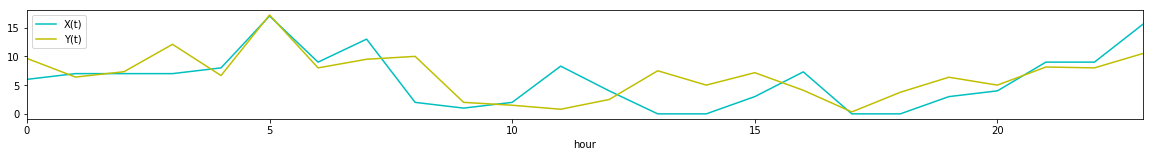

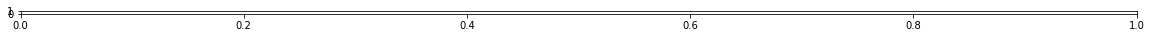

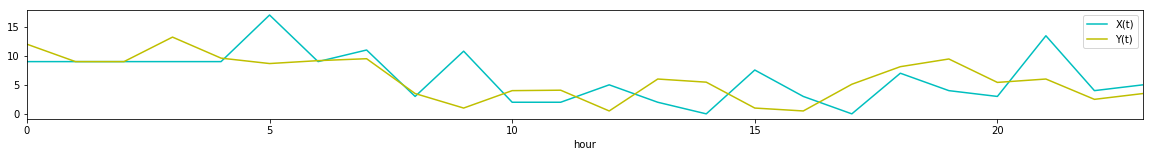

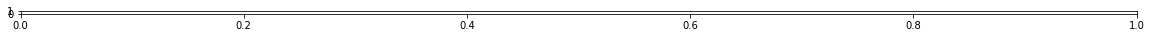

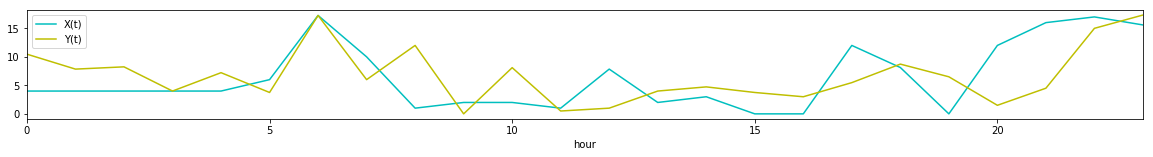

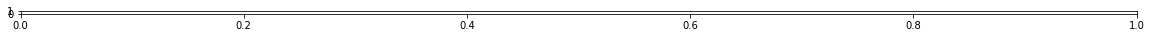

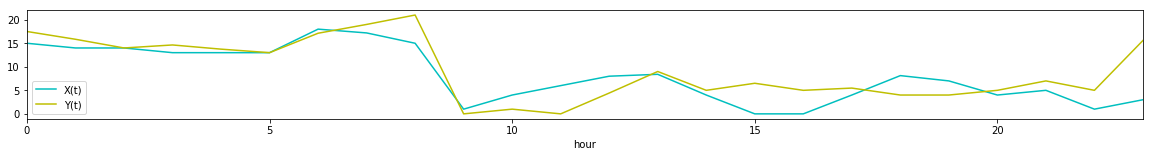

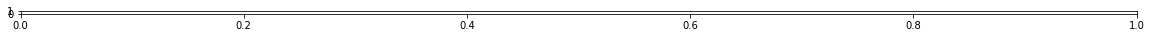

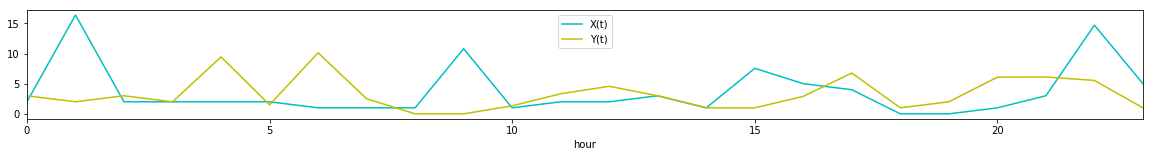

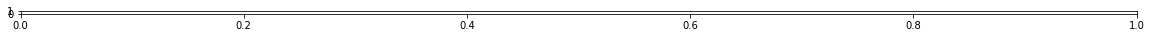

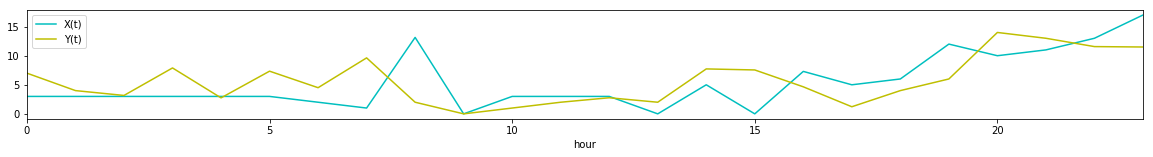

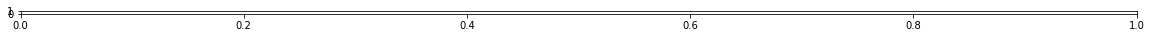

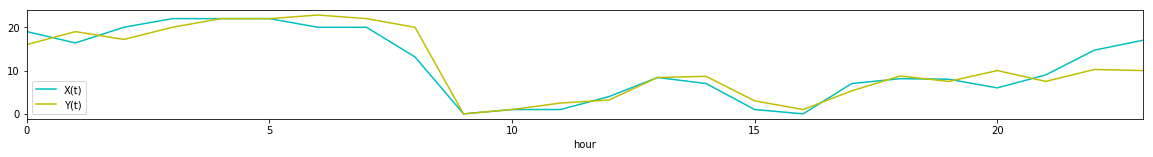

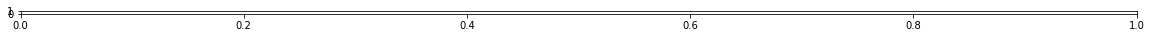

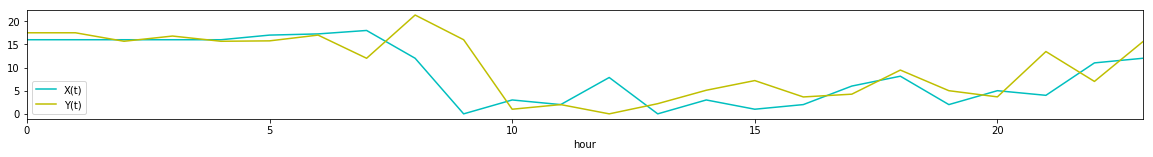

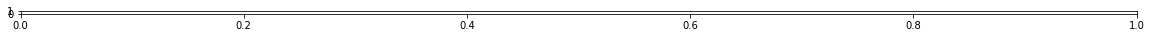

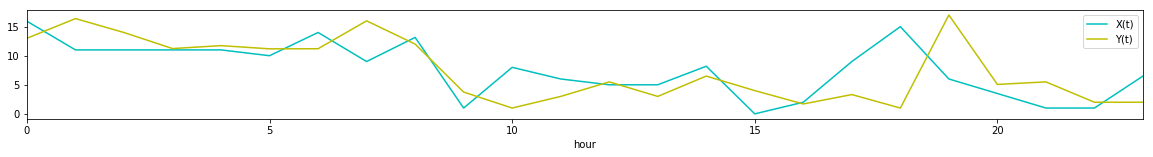

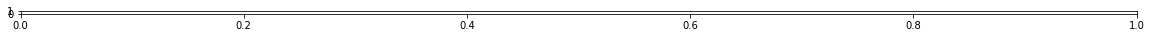

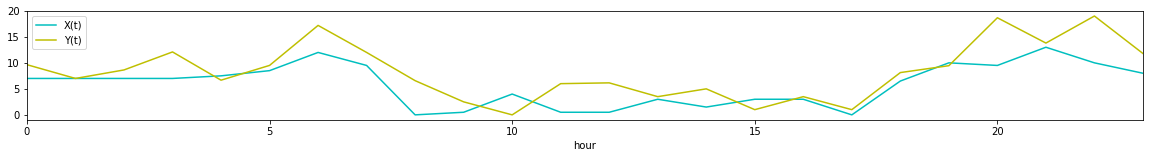

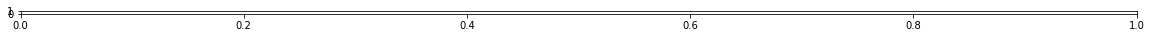

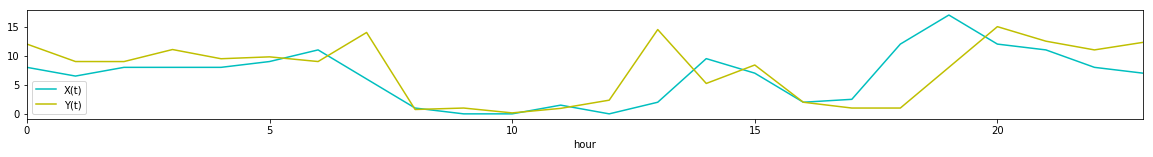

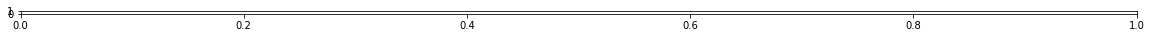

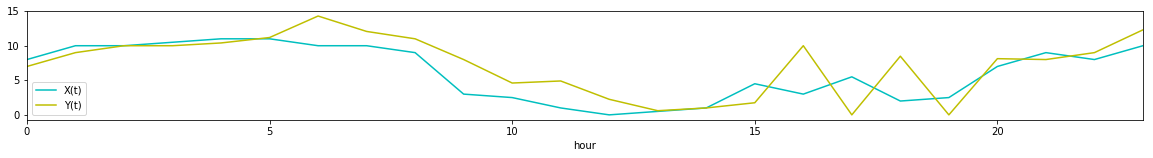

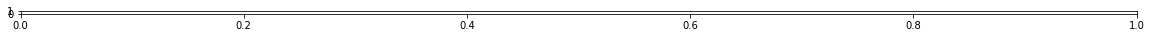

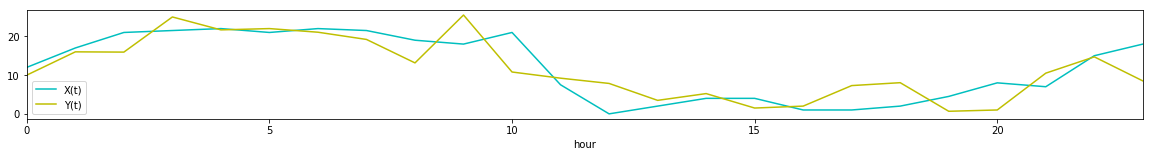

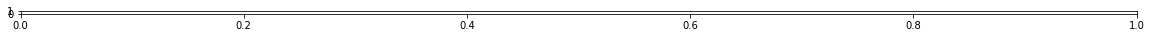

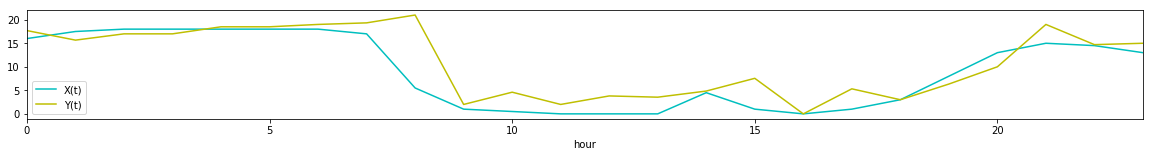

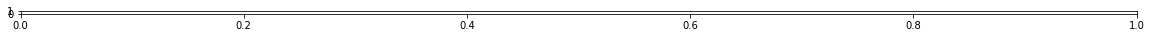

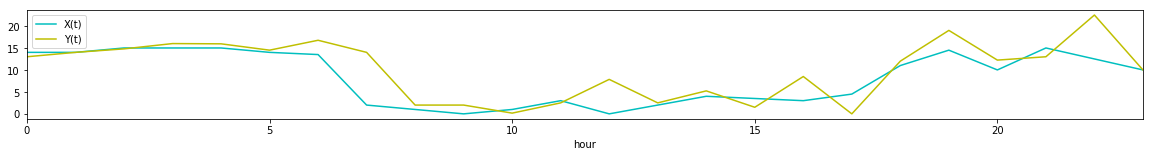

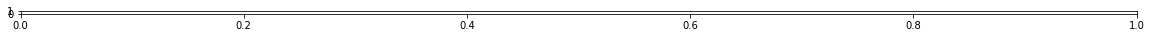

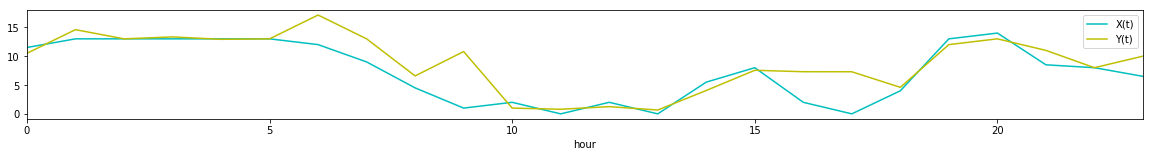

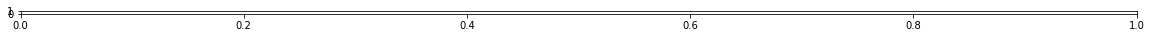

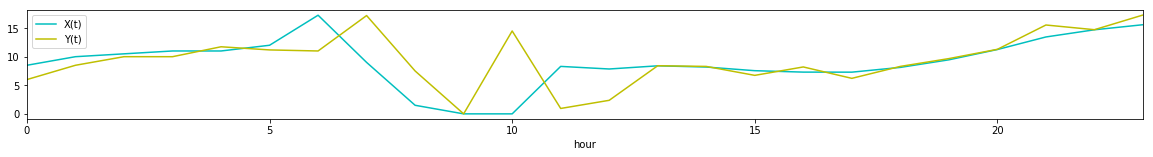

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=20,2
fignum=1
for i in range(len(all_date)-30,len(all_date)):
    curr_date=all_date[i]
    plt.subplot(30,1,fignum)
    y_given=Testing.loc[Testing.date==curr_date,['hour','X(t)']]
    y_given=y_given.set_index('hour')
    ax=y_given.plot(color='c')
    y_hat=y_pred[Testing.date==curr_date]
    y_hat=pd.DataFrame(y_hat,index=y_given.index,columns=['Y(t)'])
    y_hat.plot(color='y',ax=ax)
    plt.show()
    fignum=fignum+1

## Neural Network

In [19]:
from sklearn.neural_network import MLPRegressor
X_train=Training.drop(['X(t)','date'],axis=1)
y_traing=Training['X(t)']

X_test=Testing.drop(['X(t)','date'],axis=1)
y_test=Testing['X(t)']

In [20]:
nn=MLPRegressor(hidden_layer_sizes=50,activation= 'tanh',random_state=5)
nn.fit(X_train,y_traing)
y_pred=nn.predict(X_test)
nn.score(X_test,y_test),metrics.mean_squared_error(y_test, y_pred)

/home/jupyterlab/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


(0.6221232459464743, 15.386891300903718)

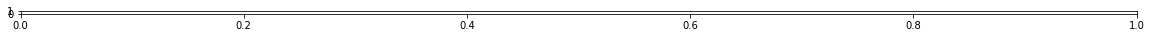

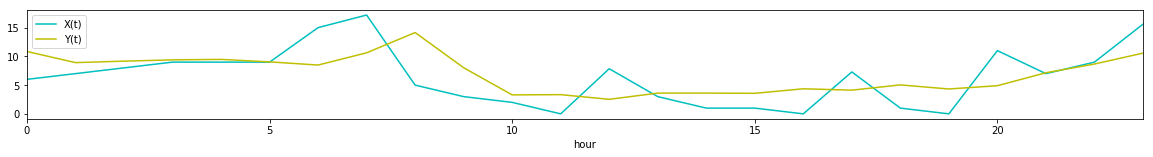

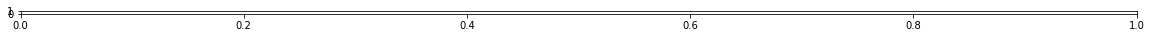

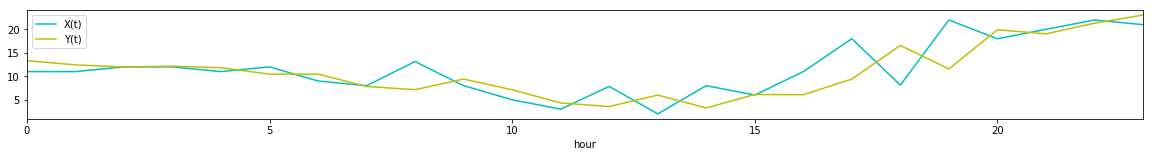

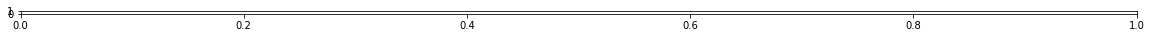

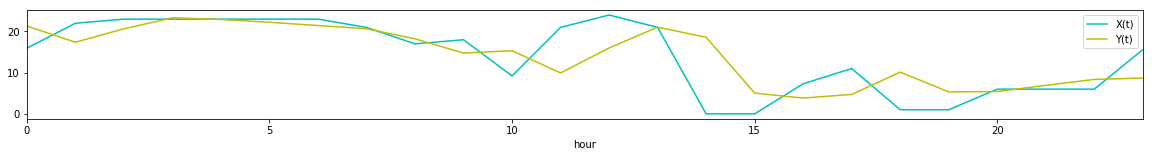

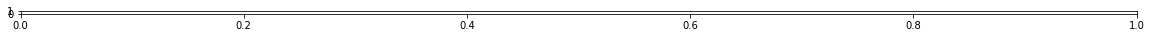

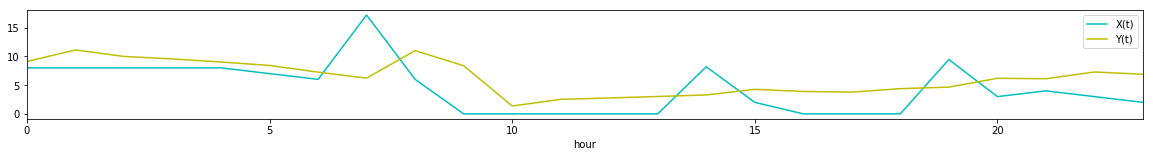

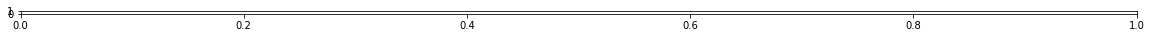

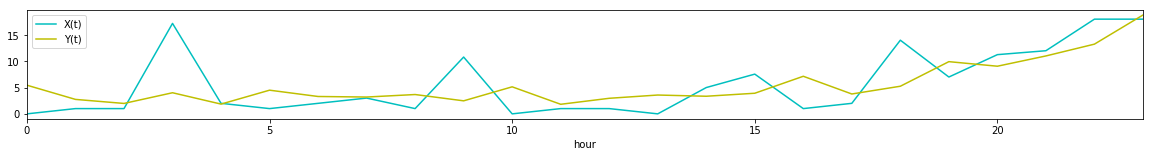

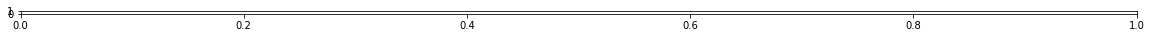

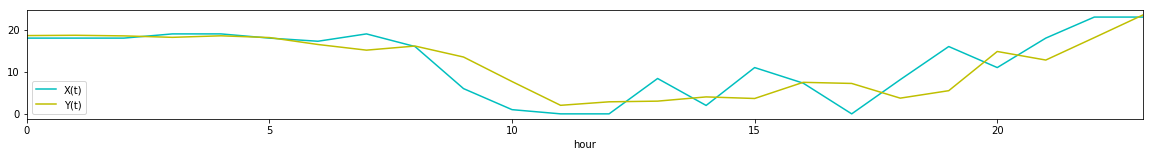

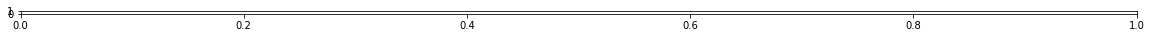

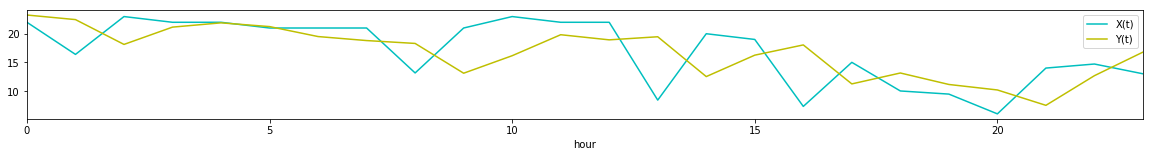

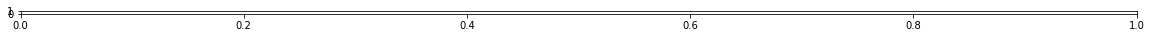

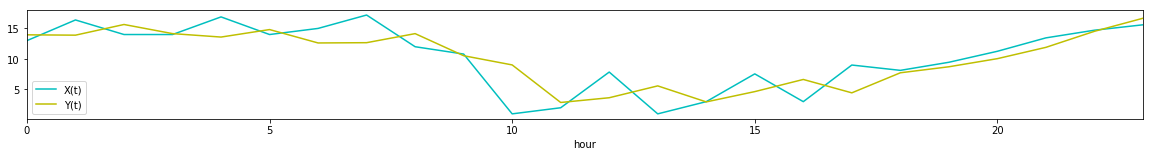

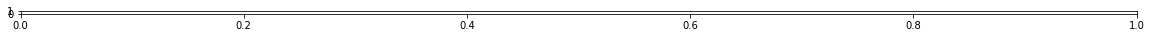

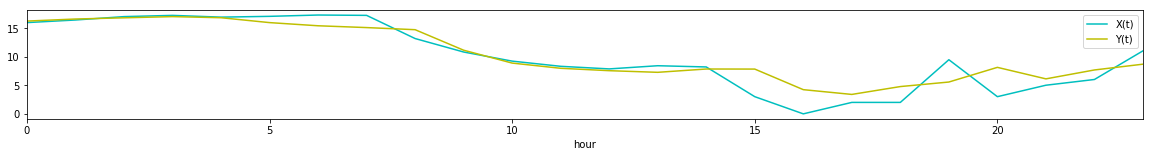

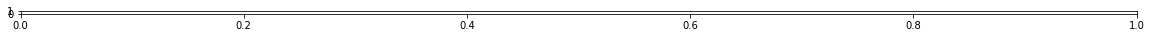

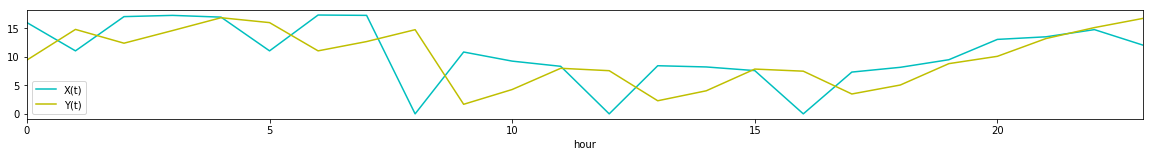

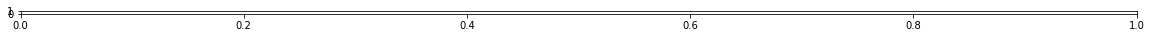

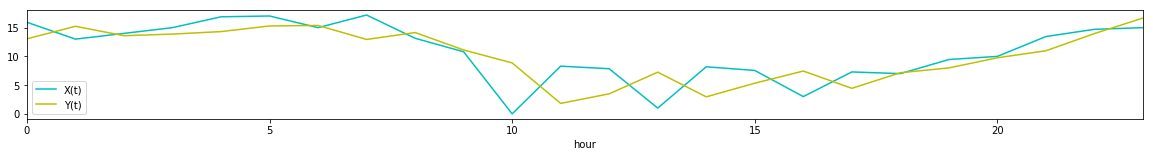

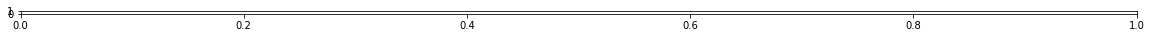

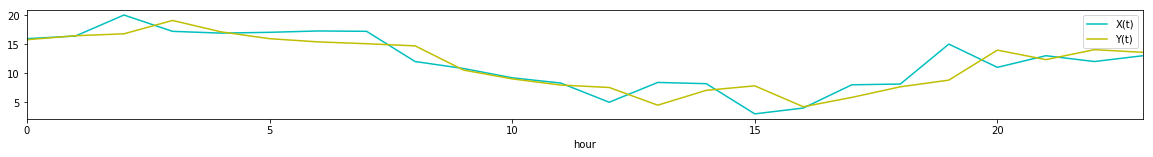

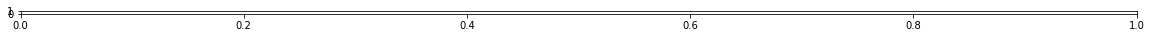

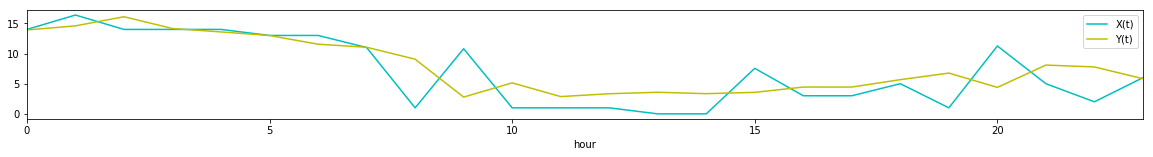

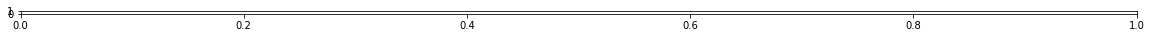

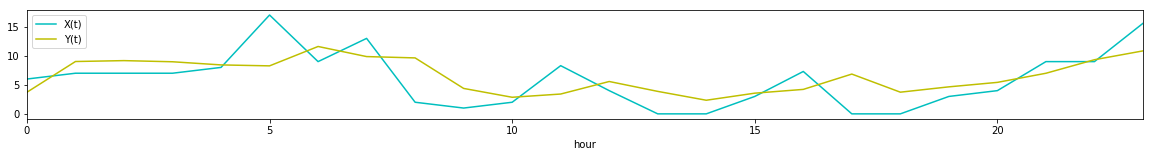

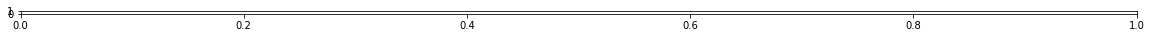

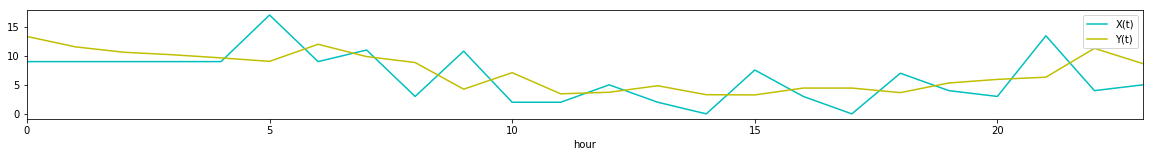

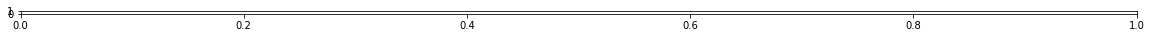

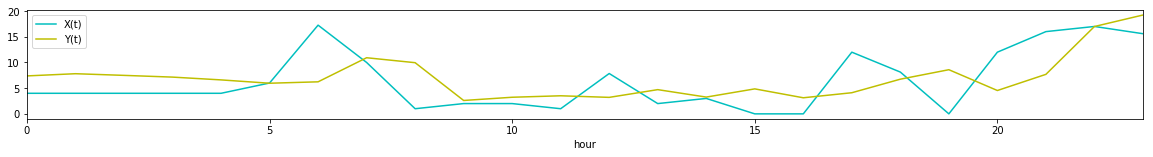

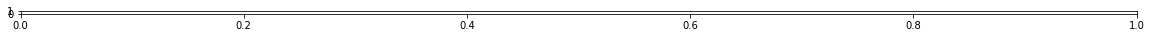

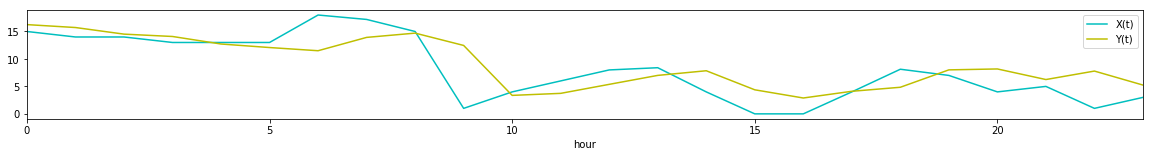

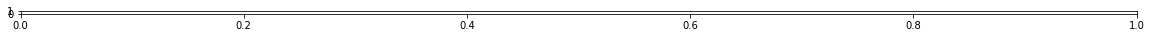

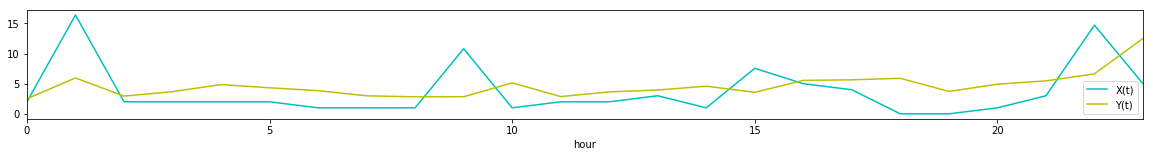

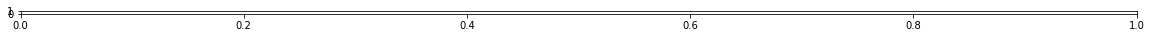

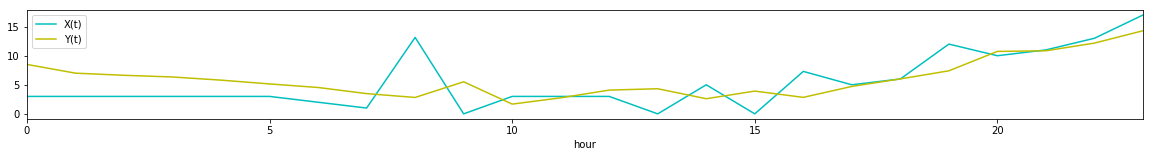

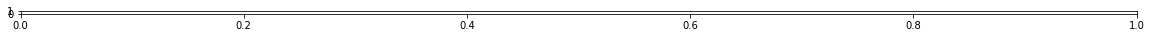

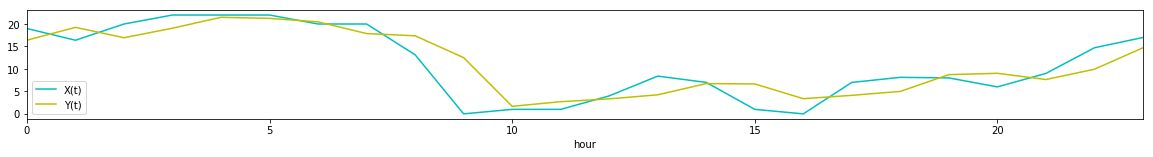

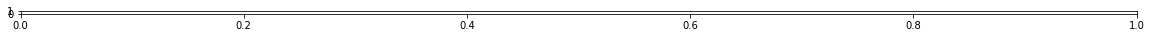

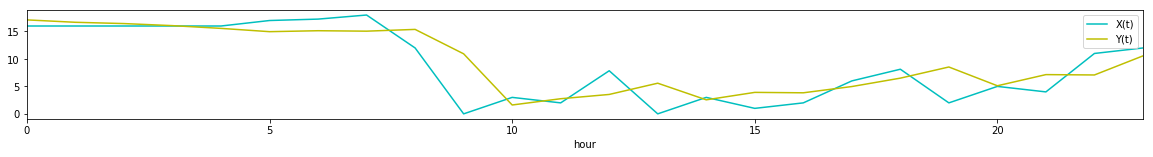

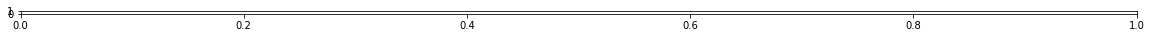

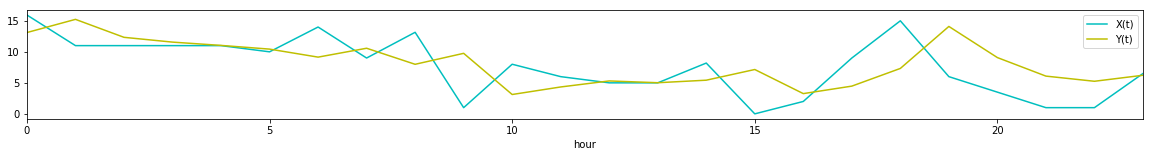

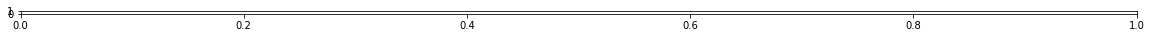

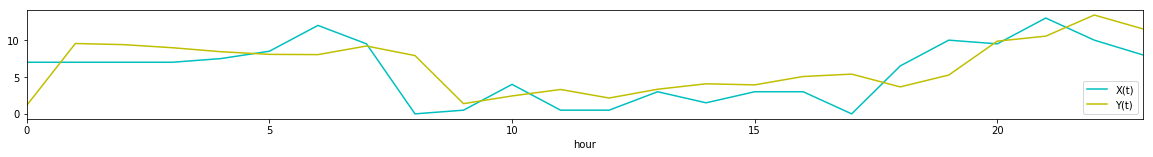

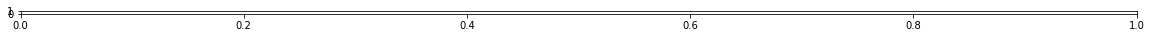

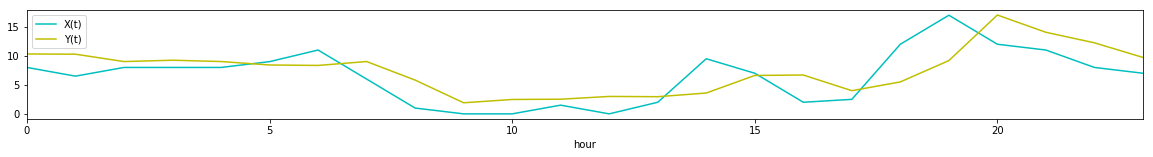

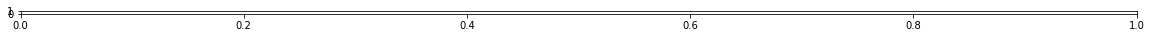

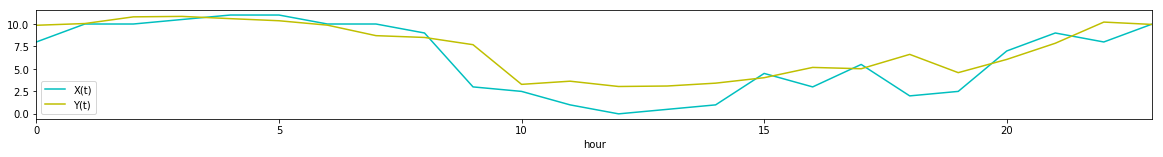

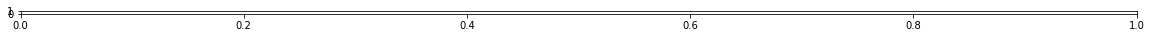

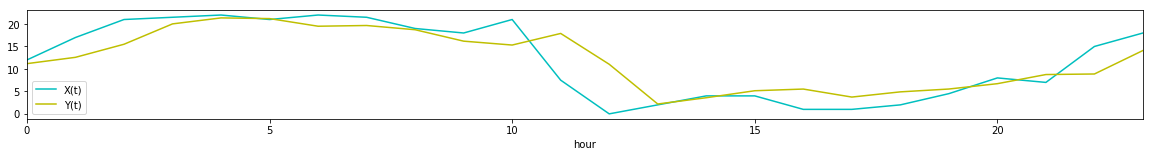

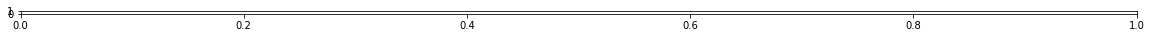

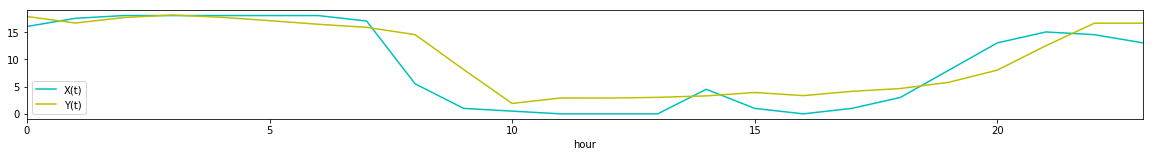

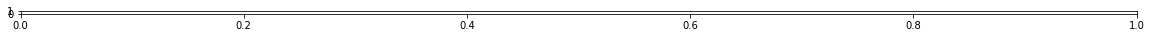

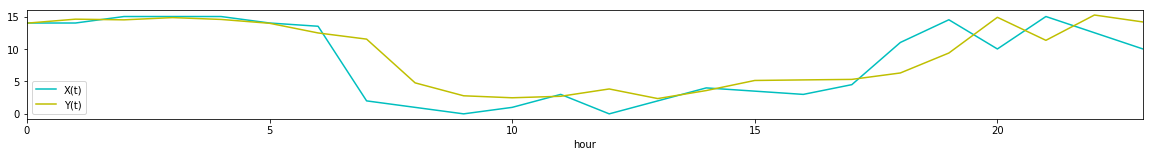

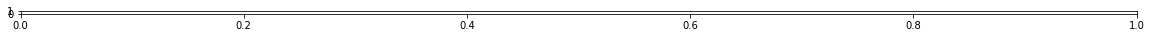

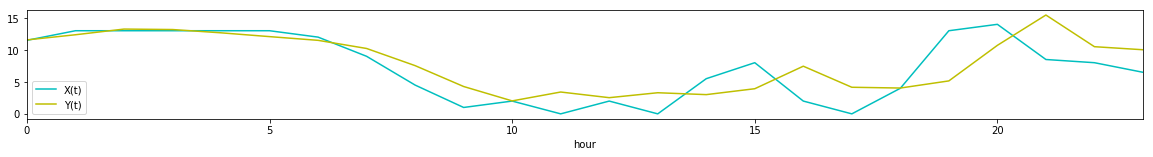

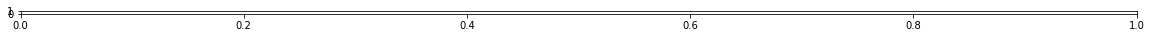

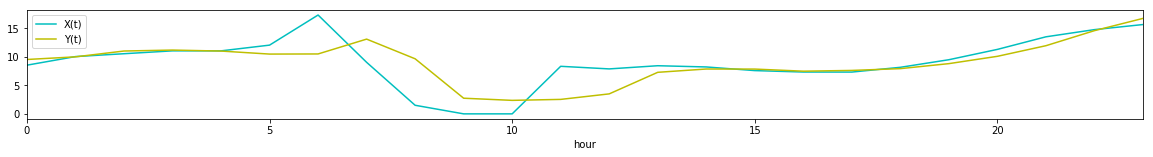

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=20,2
fignum=1
for i in range(len(all_date)-30,len(all_date)):
    curr_date=all_date[i]
    plt.subplot(30,1,fignum)
    y_given=Testing.loc[Testing.date==curr_date,['hour','X(t)']]
    y_given=y_given.set_index('hour')
    ax=y_given.plot(color='c')
    y_hat=y_pred[Testing.date==curr_date]
    y_hat=pd.DataFrame(y_hat,index=y_given.index,columns=['Y(t)'])
    y_hat.plot(color='y',ax=ax)
    plt.show()
    fignum=fignum+1